## 150 - Hurricane Markers - Making matplotlib Markers from SVG

[Youtube](https://www.youtube.com/watch?v=Hggn5r3IKJA)

In [1]:
from svgpath2mpl import parse_path
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [2]:
hurricane = parse_path("""M9885 12054 c-594 -30 -1034 -77 -1520 -165 -1695 -304 -3215 -1019
-4289 -2015 -832 -771 -1381 -1694 -1611 -2704 -98 -430 -140 -830 -139 -1325
0 -345 12 -504 55 -754 108 -623 302 -1066 740 -1686 325 -460 421 -624 471
-800 18 -66 22 -104 22 -215 -1 -168 -23 -251 -123 -455 -346 -703 -1060
-1202 -2090 -1460 -376 -94 -809 -155 -1211 -171 l-174 -7 74 -18 c495 -119
1116 -211 1720 -256 326 -24 1120 -24 1440 0 399 30 718 68 1072 127 1953 326
3688 1200 4777 2405 753 834 1191 1760 1331 2817 151 1146 11 2043 -445 2828
-78 136 -224 355 -395 595 -294 413 -384 600 -397 825 -10 167 24 304 125 510
268 545 781 982 1482 1262 524 210 1184 343 1805 365 l180 7 -70 17 c-116 30
-448 97 -640 128 -362 60 -697 100 -1065 127 -200 14 -957 26 -1125 18z""")

In [3]:
hurricane.vertices -= hurricane.vertices.mean(axis=0)

In [4]:
map_crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35, standard_parallels = (30, 60))

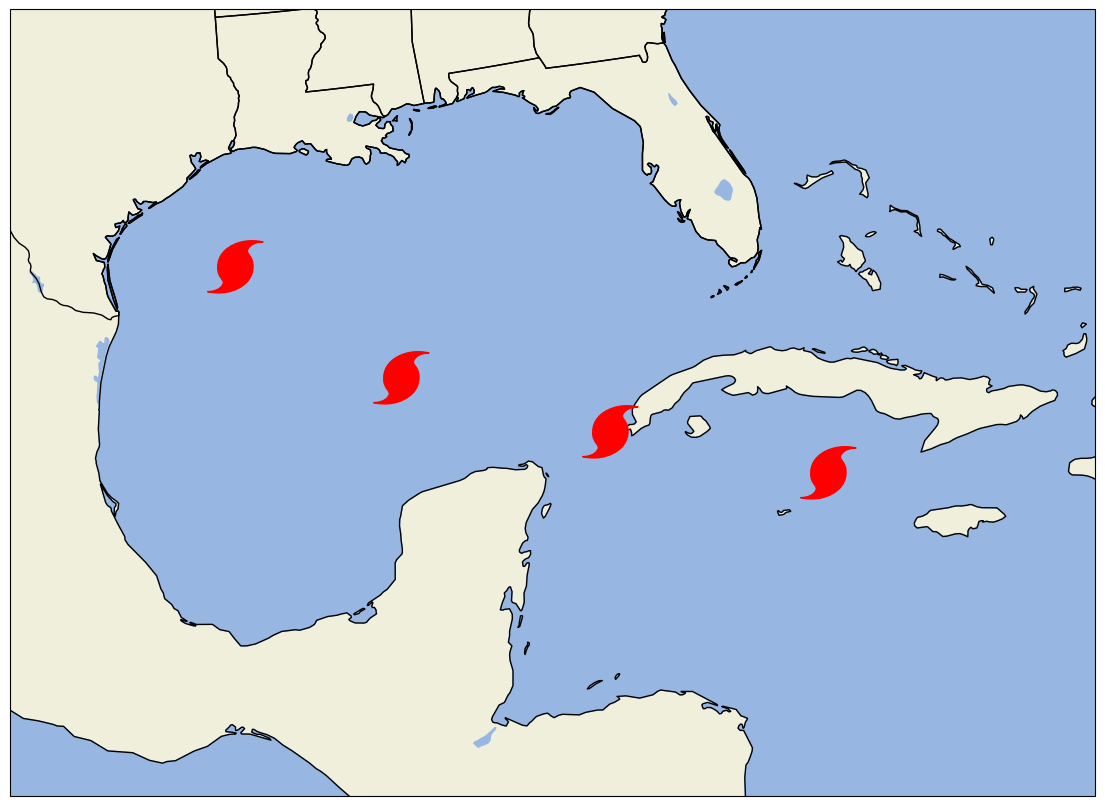

In [5]:
fig = plt.figure(1, figsize = (14, 12))
ax = plt.subplot(111, projection = map_crs)
ax.set_extent([-100, -75, 15, 30], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

lats = [20, 22, 24, 27]
lons = [-80, -85, -90, -94]

ax.plot(lons, lats, marker = hurricane, transform = ccrs.PlateCarree(), markersize = 40, color = 'r', linestyle = 'None')